In [332]:
base_dir = "2"

In [333]:
import os

In [334]:
os.makedirs(base_dir, exist_ok=True)

# Converting images into structured arrays and scalers

In [335]:
import wget
import os
import shutil

def download_file(url, base_dir = ""):
    output = wget.download(url)
    
    if base_dir!="":
        file_path = os.path.join(base_dir,output)
        shutil.copy(output, file_path)
        os.remove(output)
        return file_path
    return output

In [336]:
file_path = download_file("https://upload.wikimedia.org/wikipedia/commons/b/b6/Felis_catus-cat_on_snow.jpg","2")

In [337]:
## Reading the image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [338]:
img = cv2.imread(file_path)

In [530]:
img.shape

(2000, 3000, 3)

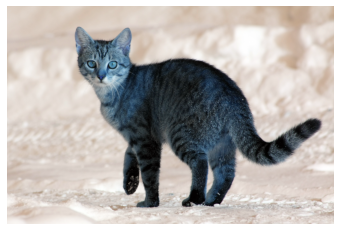

In [339]:
plt.imshow(img, cmap=plt.cm.binary)
plt.axis("off")
plt.show()

In [340]:
### Cropping image  and converting to greyscale

In [341]:
crop_image = img[:250,:200]

In [342]:
greyscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

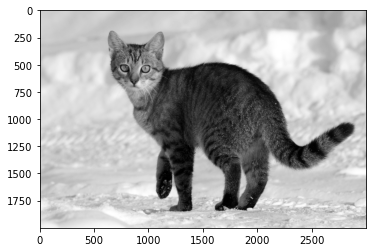

In [343]:
plt.imshow(greyscale_img, cmap = "gray")

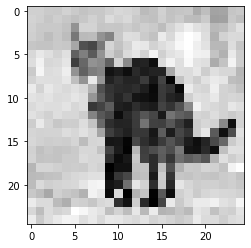

In [344]:
### Resizing image


resized_img = cv2.resize(greyscale_img, (25,25))
plt.imshow(resized_img, "gray")

In [345]:
print(resized_img)

[[207 207 202 201 209 202 195 200 200 207 215 212 207 187 193 208 194 197
  199 172 190 163 165 197 201]
 [210 206 198 205 199 192 199 208 200 219 209 216 202 195 192 206 195 203
  189 187 202 159 161 200 191]
 [208 201 201 201 194 148 210 211 197 199 198 204 198 206 202 189 210 224
  238 224 217 185 189 207 224]
 [206 200 189 200 189 121 186 188 149 133 200 221 219 203 194 234 216 243
  254 246 221 177 209 217 216]
 [198 196 196 201 199 167  83  73 123 212 194 211 233 230 209 220 229 247
  254 238 225 184 184 220 198]
 [215 231 222 211 223  99 128  93 148 205 185 218 228 210 243 207 224 231
  251 240 238 195 177 232 204]
 [220 241 214 217 228  64 104 147 139  99 210 139  34  38  16 217 242 222
  248 226 222 172 196 242 205]
 [202 245 219 222 237 148  99 126 134  22  32  17  45  31  38  38 168 221
  219 230 205 222 214 214 183]
 [211 222 221 220 230 191 149 232 151  37  52  40  40  61  27  70   8 194
  219 205 224 233 228 190 186]
 [234 210 231 222 216 223 214 178  84  55  46  44  49  

In [346]:
import seaborn as sns

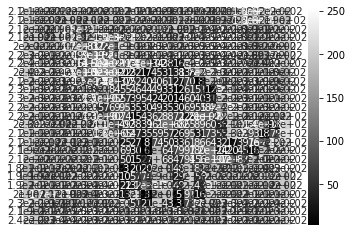

In [347]:
sns.heatmap(resized_img, cmap="gray", annot=True)
plt.axis("off")
plt.show()  ## black == 0, white == 255

# Working on color images

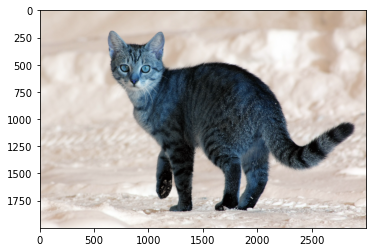

In [348]:
plt.imshow(img)

In [349]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

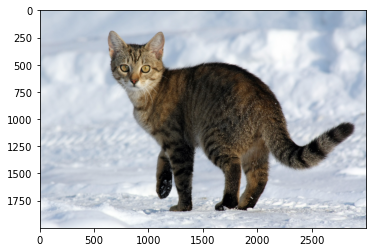

In [350]:
plt.imshow(img)

In [351]:
red_img = img[:,:,0]

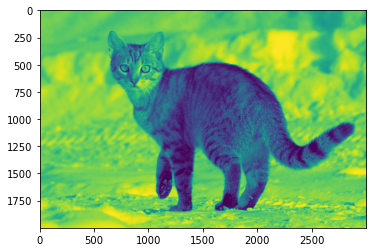

In [352]:
plt.imshow(red_img)

# Traditional CV methods

In [353]:
## Histogram feature: Measures the illumination of each feature
## can be helpful in problems of night vision or auto brightness

In [354]:
greyscale_img.shape

(2000, 3000)

In [355]:
cropped_img = greyscale_img[200:400, 500:800]

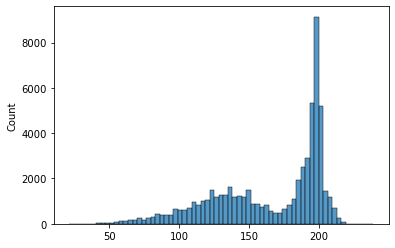

In [356]:
#plt.hist(cropped_img.ravel())
sns.histplot(cropped_img.ravel())
plt.show()

In [357]:
img.ravel()

array([196, 208, 220, ..., 218, 226, 229], dtype=uint8)

# Preparing data for classification

In [358]:
import torch
from torchvision import datasets

In [359]:
base_dir

'2'

In [360]:
data_dir = os.path.join(base_dir,"data","MNIST")

In [361]:
data_dir

'2\\data\\MNIST'

In [362]:
fmnist = datasets.FashionMNIST(root=data_dir, train=True, download=True)

In [363]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [364]:
print(tr_targets.unique())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [365]:
tr_images.shape

torch.Size([60000, 28, 28])

In [366]:
fmnist.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [367]:
fmnist.class_to_idx['Bag']

8

### Plotting

In [368]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

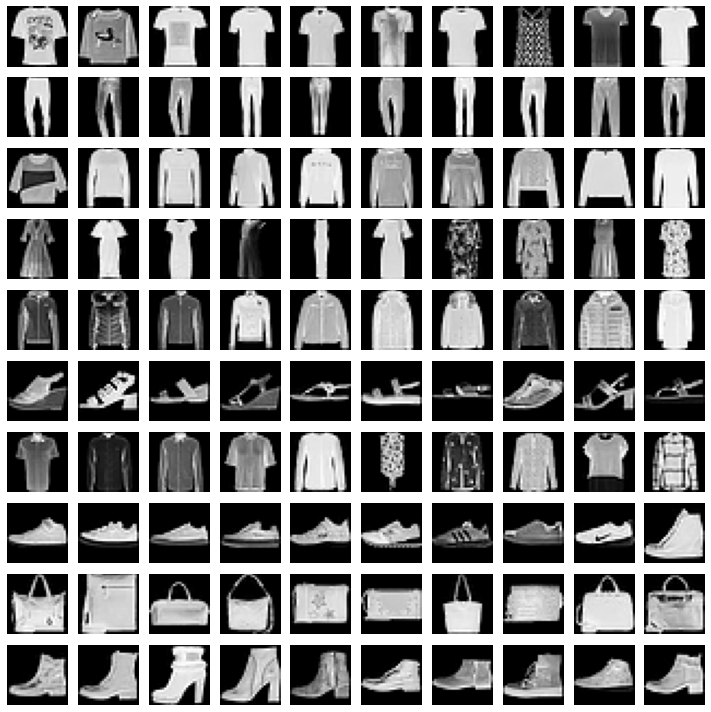

In [369]:
R, C = len(fmnist.targets.unique()), 10
fig, ax = plt.subplots(R,C,figsize=(10,10))
for label_class, plot_row in enumerate(ax):  ## label_class ranges from 0 to 9
    label_x_rows = np.where(tr_targets == label_class)[0]
    
    for plot_cell in plot_row :
        plot_cell.grid("False")
        plot_cell.axis("off")
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap = 'gray')
        
plt.tight_layout()

In [370]:
np.where(tr_targets == 0)[0]

array([    1,     2,     4, ..., 59974, 59985, 59998], dtype=int64)

In [371]:
tr_targets[tr_targets == 0]

tensor([0, 0, 0,  ..., 0, 0, 0])

# Training Neural Network

In [372]:
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [373]:
device = "cuda" if torch.cuda.is_available() else "cpu" 

In [374]:
from torchvision import datasets

In [375]:
data_dir

'2\\data\\MNIST'

In [376]:
fmnist

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 2\data\MNIST
    Split: Train

In [377]:
tr_targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [378]:
tr_images

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [379]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        #x = x.float()
        #x = x.view(-1, 28*28)
        #self.x = x
        print(f"x: {x.shape}")
        self.x = x.float()
        
        print(f"self.x : {self.x.shape}")
        self.x = self.x.view(-1,28*28)
        print(f"2-self.x: {self.x.shape}")
        
        self.y = y
        
    def __getitem__(self, index):
        x, y = self.x[index], self.y[index]
        return x.to(device), y.to(device)
    
    def __len__(self):
        return len(self.x) 
        


        

In [380]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl
    

In [381]:
from torch.optim import SGD
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10) #### In Pytorch, no need to convert raw values to logits (use softmax) as Cross entropy loss expects the values to be unconstrained 
    ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)
    return model, loss_fn, optimizer

In [382]:
def train_batch(x, y, model, optimizer, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    return batch_loss.item()
    
    

In [383]:
## since there is no need for updating weights, we dont calculate gradients as well

@torch.no_grad()
def accuracy(x, y, model):
    model.eval() ## we inform layers like dropout, batch_norm to behave differently 
    
    prediction = model(x)
    
    max_values, argmaxes = prediction.max(-1)
    
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [384]:
trn_dl = get_data()

x: torch.Size([60000, 28, 28])
self.x : torch.Size([60000, 28, 28])
2-self.x: torch.Size([60000, 784])


In [385]:
model, loss_fn, optimizer = get_model()

In [386]:
losses, accuracies = [], []

In [387]:
for epoch in range(5):
    print(f"epoch: {epoch}")
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x,y,model, optimizer, loss_fn)
        
        epoch_losses.append(batch_loss)
        
    epoch_loss = np.array(epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x,y = batch
        is_correct = accuracy(x,y,model)
        
        epoch_accuracies.extend(is_correct)
        
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)
    
    print(f"loss: {epoch_loss}")
    print(f"accuracy: {epoch_accuracy}")    
    

epoch: 0
loss: 25.02046698665619
accuracy: 0.1346
epoch: 1
loss: 2.2276088379542034
accuracy: 0.1236
epoch: 2
loss: 2.1752748951594034
accuracy: 0.15438333333333334
epoch: 3
loss: 2.1617664380391437
accuracy: 0.1645
epoch: 4
loss: 2.1890667273839313
accuracy: 0.1429


In [388]:
trn_dl = get_data()

x: torch.Size([60000, 28, 28])
self.x : torch.Size([60000, 28, 28])
2-self.x: torch.Size([60000, 784])


In [389]:
next(iter(trn_dl))[0].view(-1,28*28).shape

torch.Size([32, 784])

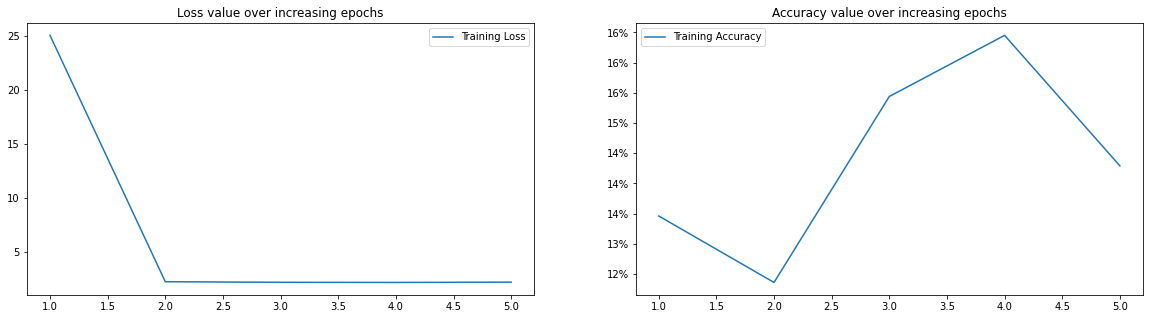

In [390]:
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
     

# Hyperparameters

#### Scaling

In [391]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [392]:
device

'cuda'

In [393]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        self.x =x.float()/255 
        
        self.x = self.x.view(-1,28*28)
        
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)
    
    def __len__(self):
        return len(self.x)
    
        

In [394]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size= 32, shuffle=True)
    return trn_dl
    

In [395]:
from torch.optim import SGD

In [396]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr = 1e-2)
    return model, loss_fn, optimizer
    

In [397]:
def train_batch(x,y,model, optimizer, loss_fn):
    model.train()
    prediction = model(x)
    loss = loss_fn(prediction, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()
    
    
    

In [398]:
@torch.no_grad()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values , argmaxes = prediction.max(-1)
    #print(prediction)
    
    is_correct = argmaxes==y
    #print(is_correct)
    
    return is_correct.cpu().numpy().tolist()



In [399]:
trn_dl = get_data()

In [400]:
model, loss_fn, optimizer = get_model()

In [401]:
losses, accuracies = [], []

for epoch in range(5):
    print(f"epoch: {epoch}")
    
    epoch_losses, epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        
        batch_loss = train_batch(x,y,model, optimizer,loss_fn)
        epoch_losses.append(batch_loss)
        
    epoch_loss = np.array(epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x,y, model)
        
        epoch_accuracies.extend(is_correct)
   
    epoch_accuracy = np.mean(epoch_accuracies)
    
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)
    
    print(f"Current loss: {epoch_loss}" )
    print(f"Current accuracy: {epoch_accuracy}")

epoch: 0
Current loss: 0.8422655535697937
Current accuracy: 0.8085666666666667
epoch: 1
Current loss: 0.5369511613210042
Current accuracy: 0.8309166666666666
epoch: 2
Current loss: 0.4832042771100998
Current accuracy: 0.8410666666666666
epoch: 3
Current loss: 0.45485360719362894
Current accuracy: 0.8493333333333334
epoch: 4
Current loss: 0.4359499941110611
Current accuracy: 0.8524166666666667


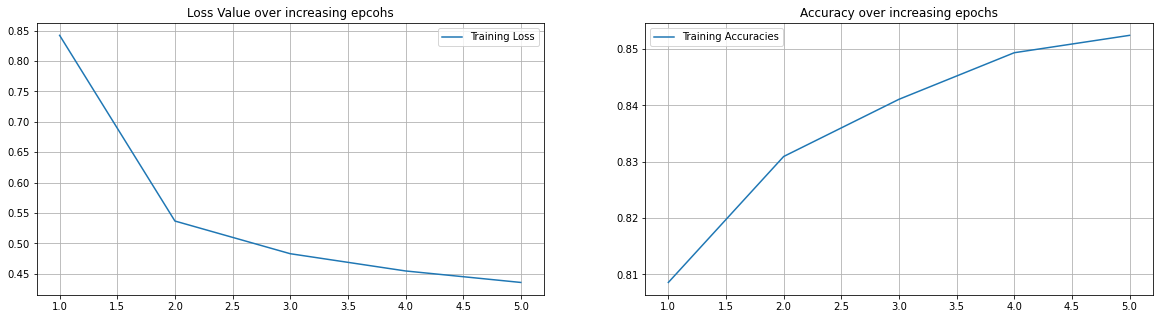

In [402]:
epochs = np.arange(5) + 1
plt.figure(figsize=(20,5))


plt.subplot(1,2,1)
plt.title(f"Loss Value over increasing epcohs")
plt.grid()
plt.plot(epochs, losses, label = "Training Loss")
plt.legend()


plt.subplot(1,2,2)
plt.title(f"Accuracy over increasing epochs")
plt.grid()
plt.plot(epochs, accuracies, label = "Training Accuracies")
plt.legend()



In [403]:
## Clearly with scaling the accuracy is better compared to earlier
## Why scaling helps
## Machine learning algorithm just sees number — if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, 
## and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a 
## more decisive role while training the model.


#### Batch Size

In [404]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        self.x =x.float()/255 
        
        self.x = self.x.view(-1,28*28)
        
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)
    
    def __len__(self):
        return len(self.x)
    
        

#### Batch Size

In [405]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        self.x =x.float()/255 
        
        self.x = self.x.view(-1,28*28)
        
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)
    
    def __len__(self):
        return len(self.x)
    

In [406]:
data_dir

'2\\data\\MNIST'

In [407]:
## Getting validation data
val_fmnist = datasets.FashionMNIST(data_dir,download=True, train =False)

In [408]:
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [409]:
### using batch size of 1000
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size= 1000, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=1000, shuffle = True)
    
    return trn_dl, val_dl
    

In [410]:
from torch.optim import Adam

In [411]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr = 1e-2)
    return model, loss_fn, optimizer

In [412]:
def train_batch(x,y,model, optimizer, loss_fn):
    model.train()
    prediction = model(x)
    loss = loss_fn(prediction, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()

In [413]:
@torch.no_grad()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values , argmaxes = prediction.max(-1)
    #print(prediction)
    
    is_correct = argmaxes==y
    #print(is_correct)
    
    return is_correct.cpu().numpy().tolist()

In [414]:
@torch.no_grad()
def val_loss(x,y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [415]:
trn_dl , val_dl = get_data()

In [416]:
model, loss_fn, optimizer = get_model()

In [417]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(5):
    print(f"epoch: {epoch}")
    
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        
        batch_loss = train_batch(x,y,model, optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
        
    train_epoch_loss = np.array(epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x,y, model)
        
        train_epoch_accuracies.extend(is_correct)
   
    train_epoch_accuracy = np.mean(epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x,y, model)
        validation_loss =  val_loss(x,y,model)

    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
    
    
    print(f"Current loss: {epoch_loss}" )
    print(f"Current accuracy: {epoch_accuracy}")
    print(f"Current validation loss: {validation_loss}")
    print(f"Current validation accuracy: {val_epoch_accuracy}")

epoch: 0
Current loss: 0.4359499941110611
Current accuracy: 0.8524166666666667
Current validation loss: 0.48914647102355957
Current validation accuracy: 0.826
epoch: 1
Current loss: 0.4359499941110611
Current accuracy: 0.8524166666666667
Current validation loss: 0.39385348558425903
Current validation accuracy: 0.844
epoch: 2
Current loss: 0.4359499941110611
Current accuracy: 0.8524166666666667
Current validation loss: 0.3735911250114441
Current validation accuracy: 0.877
epoch: 3
Current loss: 0.4359499941110611
Current accuracy: 0.8524166666666667
Current validation loss: 0.3273060917854309
Current validation accuracy: 0.875
epoch: 4
Current loss: 0.4359499941110611
Current accuracy: 0.8524166666666667
Current validation loss: 0.39232146739959717
Current validation accuracy: 0.861


In [418]:
#### When we have 10000 as the batch size, the number of weight updates are lesser. 
#### Here, for each epoch we did 6 updates: 60k / 10k, hence learning is generally better 
#### with lesser batch size when number of epochs is lower

#### Impact of optimizer

###### SGD optimizer

In [419]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        self.x =x.float()/255 
        
        self.x = self.x.view(-1,28*28)
        
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)
    
    def __len__(self):
        return len(self.x)
    

In [420]:

def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size= 32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=32, shuffle = True)
    
    return trn_dl, val_dl

In [421]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr = 1e-2)
    return model, loss_fn, optimizer

In [422]:
def train_batch(x,y,model, optimizer, loss_fn):
    model.train()
    prediction = model(x)
    loss = loss_fn(prediction, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()

In [423]:
@torch.no_grad()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values , argmaxes = prediction.max(-1)
    #print(prediction)
    
    is_correct = argmaxes==y
    #print(is_correct)
    
    return is_correct.cpu().numpy().tolist()

In [424]:
@torch.no_grad()
def val_loss(x,y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [425]:
trn_dl , val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [426]:
epochs =  10  ### will use 10 epochs

In [427]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(10):
    print(f"epoch: {epoch}")
    
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        
        batch_loss = train_batch(x,y,model, optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
        
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x,y, model)
        
        train_epoch_accuracies.extend(is_correct)
   
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x,y, model)
        validation_loss =  val_loss(x,y,model)

    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
    
    
    print(f"Current loss: {train_epoch_loss}" )
    print(f"Current accuracy: {train_epoch_accuracy}")
    print(f"Current validation loss: {validation_loss}")
    print(f"Current validation accuracy: {val_epoch_accuracy}")

epoch: 0
Current loss: 0.843242680756251
Current accuracy: 0.7941833333333334
Current validation loss: 0.5906429886817932
Current validation accuracy: 0.6875
epoch: 1
Current loss: 0.5383796468655269
Current accuracy: 0.8318666666666666
Current validation loss: 0.4758232533931732
Current validation accuracy: 0.875
epoch: 2
Current loss: 0.4840385397195816
Current accuracy: 0.8409166666666666
Current validation loss: 0.4137457311153412
Current validation accuracy: 0.875
epoch: 3
Current loss: 0.4563175895253817
Current accuracy: 0.8499333333333333
Current validation loss: 0.3342856466770172
Current validation accuracy: 0.875
epoch: 4
Current loss: 0.4366920872290929
Current accuracy: 0.8512833333333333
Current validation loss: 0.35645487904548645
Current validation accuracy: 0.875
epoch: 5
Current loss: 0.42213367497523624
Current accuracy: 0.8561333333333333
Current validation loss: 0.4655064046382904
Current validation accuracy: 0.875
epoch: 6
Current loss: 0.409145310207208
Current a

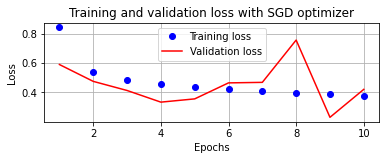

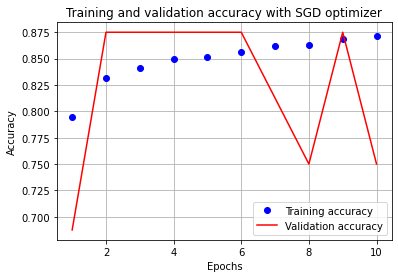

In [428]:
epochs = np.arange(10)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with SGD optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()


plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with SGD optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid('off')
plt.show()



##### Adam Optimizer

In [429]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr = 1e-2)
    return model, loss_fn, optimizer

In [430]:
trn_dl , val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [431]:
epochs =  10  ### will use 10 epochs

In [432]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(10):
    print(f"epoch: {epoch}")
    
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        
        batch_loss = train_batch(x,y,model, optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
        
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x,y, model)
        
        train_epoch_accuracies.extend(is_correct)
   
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x,y, model)
        validation_loss =  val_loss(x,y,model)

    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
    
    
    print(f"Current loss: {train_epoch_loss}" )
    print(f"Current accuracy: {train_epoch_accuracy}")
    print(f"Current validation loss: {validation_loss}")
    print(f"Current validation accuracy: {val_epoch_accuracy}")

epoch: 0
Current loss: 0.5353196406642596
Current accuracy: 0.8561
Current validation loss: 0.8502364158630371
Current validation accuracy: 0.6875
epoch: 1
Current loss: 0.43117633003393807
Current accuracy: 0.86105
Current validation loss: 0.20891781151294708
Current validation accuracy: 0.9375
epoch: 2
Current loss: 0.4129543941716353
Current accuracy: 0.8590166666666667
Current validation loss: 0.5341882705688477
Current validation accuracy: 0.8125
epoch: 3
Current loss: 0.39453830684423447
Current accuracy: 0.8587
Current validation loss: 0.7546269297599792
Current validation accuracy: 0.75
epoch: 4
Current loss: 0.39151398165822027
Current accuracy: 0.8570833333333333
Current validation loss: 0.3616994619369507
Current validation accuracy: 0.875
epoch: 5
Current loss: 0.3832757501423359
Current accuracy: 0.8770666666666667
Current validation loss: 0.7758840322494507
Current validation accuracy: 0.8125
epoch: 6
Current loss: 0.3732904231150945
Current accuracy: 0.8666333333333334
C

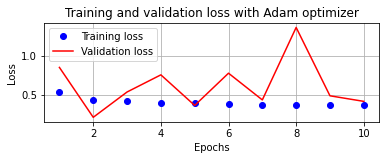

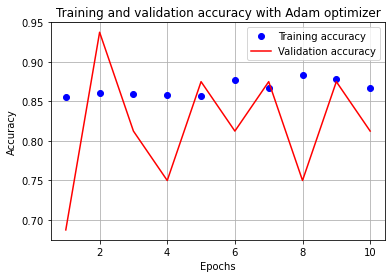

In [433]:
epochs = np.arange(10)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()


plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid('off')
plt.show()



#### Adam Optimizer: Faster
#### SGD: More Accurate

# Impact of Learning Rate

### Will also see weight distribution in underfitting scenarios

# On scaled data

#### High Learning Rate

In [434]:
### With lr = 0.1, the accuracy on validation
### data is 25 % instead of 85 % in the previous section

### Low Learning Rate

In [435]:
### It takes a very long time(100 epochs) for the model 
### to get to 89 % accuracy on validation data

In [436]:
### In addition, the difference b.w training loss and validation loss is quite less signifying a good model

# Parameter distributions accross layers.

#### This helps a lot to see if a model is properly fitting or overfitting or underfitting

In [437]:
## Taking previous model

In [438]:
torch.Tensor.detach?

Docstring:
Returns a new Tensor, detached from the current graph.

The result will never require gradient.

This method also affects forward mode AD gradients and the result will never
have forward mode AD gradients.

.. note::

  Returned Tensor shares the same storage with the original one.
  In-place modifications on either of them will be seen, and may trigger
  errors in correctness checks.
  IMPORTANT NOTE: Previously, in-place size / stride / storage changes
  (such as `resize_` / `resize_as_` / `set_` / `transpose_`) to the returned tensor
  also update the original tensor. Now, these in-place changes will not update the
  original tensor anymore, and will instead trigger an error.
  For sparse tensors:
  In-place indices / values changes (such as `zero_` / `copy_` / `add_`) to the
  returned tensor will not update the original tensor anymore, and will instead
  trigger an error.
Type:      method_descriptor


In [439]:
###### difference b.w detach and no grad:

# tensor.detach() creates a tensor that 
# shares storage with tensor that does not 
# require grad. It detaches the output from the 
# computational graph. So no gradient will 
# be backpropagated along this variable. 
# The wrapper with torch.no_grad() 
# temporarily set all the requires_grad 
# flag to false. torch.no_grad says that no 
# operation should build the graph. 
# The difference is that one refers to only 
# a given variable on which it is called. 
# The other affects all operations taking 
# place within the with statement. Also, 
# torch.no_grad will use less memory because 
# it knows from the beginning that no gradients are 
# needed so it doesn’t need to keep intermediary results.

In [440]:
### 4 sets of weight present: input-hidden weights and biases, 
### hidden-output weights and biases


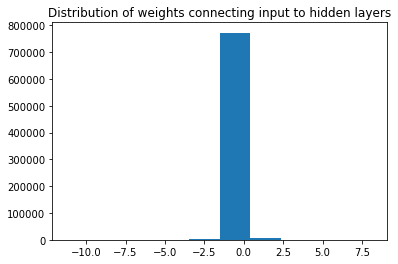

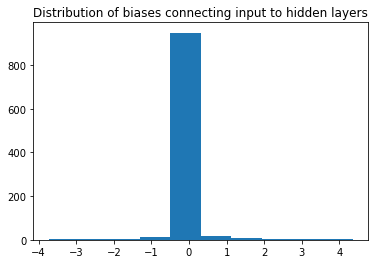

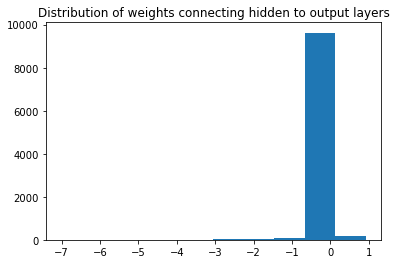

In [441]:

for ix, par in enumerate(model.parameters()):
    if ix == 0:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title(f"Distribution of weights connecting input to hidden layers")
        plt.show()
        
    elif ix == 1:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title(f"Distribution of biases connecting input to hidden layers")
        plt.show()
        
    elif ix == 2:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title(f"Distribution of weights connecting hidden to output layers")
        plt.show()
        
    elif ix == 2:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title(f"Distribution of biases connecting hidden to output layers")
        plt.show()
        
        

In [442]:
### Observation: 
### When distribution of weights(x axis) is too huge, the model is bound to overfit


### for large lr: range: -10 to 10 (actually undefitting here)
### for medium  lr : range: -0.5 to 0.5
### for low lr: range -0.1 to 0.1 (preferred) 

In [443]:
# For non scaled data as well, preferred 
# to have weights close to -0.1 to 0.1 range.

#### High lr is not preferred and often leads to undefitting

# lr annealing: Reduce lr on its own

In [444]:
### initially high weight can work,
### after some time, the weights should be updated slowly.
### How to achieve this??
### Monitor validation loss, if it doesn't improve
### for x epochs, we can reduce the lr.
### Pytorch provides this capability by lr scheduler.


In [445]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        self.x =x.float()/255 
        
        self.x = self.x.view(-1,28*28)
        
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)
    
    def __len__(self):
        return len(self.x)
    

In [446]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size= 32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=32, shuffle = False)
    
    return trn_dl, val_dl

In [447]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr = 1e-3)
    return model, loss_fn, optimizer



In [448]:
def train_batch(x,y,model, optimizer, loss_fn):
    model.train()
    prediction = model(x)
    loss = loss_fn(prediction, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()

In [449]:
@torch.no_grad()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values , argmaxes = prediction.max(-1)
    #print(prediction)
    
    is_correct = argmaxes==y
    #print(is_correct)
    
    return is_correct.cpu().numpy().tolist()

In [450]:
@torch.no_grad()
def val_loss(x,y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [464]:
trn_dl , val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [465]:
help(torch.optim.lr_scheduler.ReduceLROnPlateau)

Help on class ReduceLROnPlateau in module torch.optim.lr_scheduler:

class ReduceLROnPlateau(builtins.object)
 |  ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False)
 |  
 |  Reduce learning rate when a metric has stopped improving.
 |  Models often benefit from reducing the learning rate by a factor
 |  of 2-10 once learning stagnates. This scheduler reads a metrics
 |  quantity and if no improvement is seen for a 'patience' number
 |  of epochs, the learning rate is reduced.
 |  
 |  Args:
 |      optimizer (Optimizer): Wrapped optimizer.
 |      mode (str): One of `min`, `max`. In `min` mode, lr will
 |          be reduced when the quantity monitored has stopped
 |          decreasing; in `max` mode it will be reduced when the
 |          quantity monitored has stopped increasing. Default: 'min'.
 |      factor (float): Factor by which the learning rate will be
 |          reduced. 

In [466]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, threshold_mode='abs',factor=0.5, patience=0,min_lr=1e-5, threshold=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=0, threshold = 0.001, verbose=True, min_lr = 1e-5, threshold_mode = 'abs')

for epoch in range(15):
    print(f"epoch: {epoch}")
    
    
    print(optimizer.defaults['lr'])
    
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        
        batch_loss = train_batch(x,y,model, optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
        
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x,y, model)
        
        train_epoch_accuracies.extend(is_correct)
   
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x,y, model)
        validation_loss =  val_loss(x,y,model)
        #### This line is annealing the lr
        scheduler.step(validation_loss)
        
        
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
    
    
    print(f"Current loss: {train_epoch_loss}" )
    print(f"Current accuracy: {train_epoch_accuracy}")
    print(f"Current validation loss: {validation_loss}")
    print(f"Current validation accuracy: {val_epoch_accuracy}")

epoch: 0
0.01
Epoch 00005: reducing learning rate of group 0 to 5.0000e-03.
Epoch 00006: reducing learning rate of group 0 to 2.5000e-03.
Epoch 00007: reducing learning rate of group 0 to 1.2500e-03.
Epoch 00008: reducing learning rate of group 0 to 6.2500e-04.
Epoch 00009: reducing learning rate of group 0 to 3.1250e-04.
Epoch 00010: reducing learning rate of group 0 to 1.5625e-04.
Epoch 00011: reducing learning rate of group 0 to 7.8125e-05.
Epoch 00012: reducing learning rate of group 0 to 3.9063e-05.
Epoch 00013: reducing learning rate of group 0 to 1.9531e-05.
Epoch 00014: reducing learning rate of group 0 to 1.0000e-05.
Current loss: 0.8423613051573435
Current accuracy: 0.8089333333333333
Current validation loss: 0.3552536964416504
Current validation accuracy: 0.875
epoch: 1
0.01
Current loss: 0.5831000131766001
Current accuracy: 0.8104333333333333
Current validation loss: 0.35486507415771484
Current validation accuracy: 0.875
epoch: 2
0.01
Current loss: 0.5808682070970536
Curren

KeyboardInterrupt: 

# Building Deeper Neural Network

In [ ]:
## 0 vs 2 hidden layerss

# Batch Normalization

In [467]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        self.x =x.float()/255 
        
        self.x = self.x.view(-1,28*28)
        
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)
    
    def __len__(self):
        return len(self.x)
    

In [468]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size= 32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=32, shuffle = False)
    
    return trn_dl, val_dl

In [473]:
def get_model():
    class Myneuralnet(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_to_hidden = nn.Linear(28*28,1000)
            
            ### BatchNorm1d : applies on 2d or 3d tensor
            ### BatchNorm2d: applies on 4d tensor
            ### BatchNorm3d: applies on 5d tensor
            self.batch_norm = nn.BatchNorm1d(1000)
            self.hidden_layer_activation = nn.ReLU()
            self.hidden_to_output_layer = nn.Linear(1000,10)
            
        def forward(self, x):
            x = self.input_to_hidden(x)
            x0 = self.batch_norm(x)
            x1 = self.hidden_layer_activation(x0)
            x2 = self.hidden_to_output_layer(x1)
            return x2, x1
    
    model = Myneuralnet().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr = 1e-3)
    return model, loss_fn, optimizer

In [474]:
def train_batch(x,y,model, optimizer, loss_fn):
    model.train()
    prediction = model(x)[0]
    loss = loss_fn(prediction, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()

In [479]:
@torch.no_grad()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)[0]
    max_values , argmaxes = prediction.max(-1)
    #print(prediction)
    
    is_correct = argmaxes==y
    #print(is_correct)
    
    return is_correct.cpu().numpy().tolist()

In [480]:
@torch.no_grad()
def val_loss(x,y, model):
    prediction = model(x)[0]
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [481]:
trn_dl , val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [482]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(15):
    print(f"epoch: {epoch}")
    
    
    
    
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        
        batch_loss = train_batch(x,y,model, optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
        
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x,y, model)
        
        train_epoch_accuracies.extend(is_correct)
   
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x,y, model)
        validation_loss =  val_loss(x,y,model)
        
        
        
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
    
    
    print(f"Current loss: {train_epoch_loss}" )
    print(f"Current accuracy: {train_epoch_accuracy}")
    print(f"Current validation loss: {validation_loss}")
    print(f"Current validation accuracy: {val_epoch_accuracy}")

epoch: 0
Current loss: 0.456382235399882
Current accuracy: 0.87255
Current validation loss: 0.1578875482082367
Current validation accuracy: 0.9375
epoch: 1
Current loss: 0.3613216110606988
Current accuracy: 0.87325
Current validation loss: 0.11015262454748154
Current validation accuracy: 0.9375
epoch: 2
Current loss: 0.321515532886982
Current accuracy: 0.8967166666666667
Current validation loss: 0.12939587235450745
Current validation accuracy: 0.9375
epoch: 3
Current loss: 0.2950169530491034
Current accuracy: 0.8953333333333333
Current validation loss: 0.10479728132486343
Current validation accuracy: 0.9375
epoch: 4
Current loss: 0.2753109267711639
Current accuracy: 0.91705
Current validation loss: 0.06973126530647278
Current validation accuracy: 1.0
epoch: 5
Current loss: 0.2552076062917709
Current accuracy: 0.9219333333333334
Current validation loss: 0.12585115432739258
Current validation accuracy: 0.9375
epoch: 6
Current loss: 0.2428895993411541
Current accuracy: 0.9234833333333333


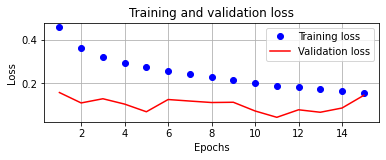

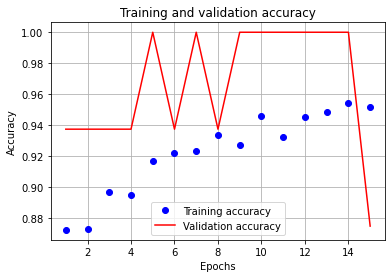

In [485]:
epochs = np.arange(15)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()


plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid('off')
plt.show()


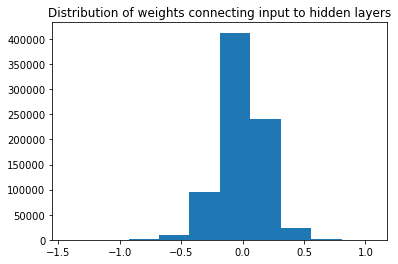

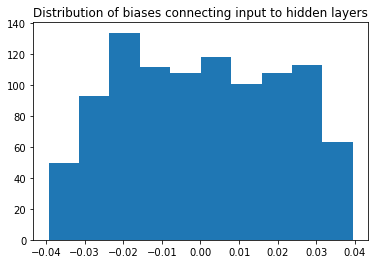

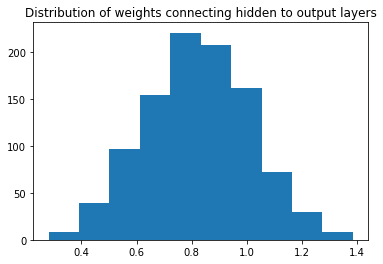

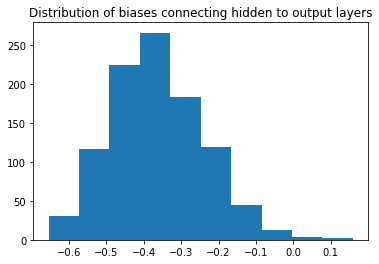

In [487]:

for ix, par in enumerate(model.parameters()):
    if ix == 0:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title(f"Distribution of weights connecting input to hidden layers")
        plt.show()
        
    elif ix == 1:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title(f"Distribution of biases connecting input to hidden layers")
        plt.show()
        
    elif ix == 2:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title(f"Distribution of weights connecting hidden to output layers")
        plt.show()
        
    elif ix == 3:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title(f"Distribution of biases connecting hidden to output layers")
        plt.show()
        
        

### Batch Normalization helps considerably when training deep neural networks. It helps us with vanishing gradient problem

# Dropout

In [488]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        self.x =x.float()/255 
        
        self.x = self.x.view(-1,28*28)
        
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)
    
    def __len__(self):
        return len(self.x)
    

In [489]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size= 32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=32, shuffle = False)
    
    return trn_dl, val_dl

In [495]:
def get_model():
    model = nn.Sequential(
        nn.Dropout(0.25),
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Linear(1000,10)
    ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr = 1e-3)
    return model, loss_fn, optimizer



In [496]:
def train_batch(x,y,model, optimizer, loss_fn):
    model.train()
    prediction = model(x)
    loss = loss_fn(prediction, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()

In [497]:
@torch.no_grad()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values , argmaxes = prediction.max(-1)
    #print(prediction)
    
    is_correct = argmaxes==y
    #print(is_correct)
    
    return is_correct.cpu().numpy().tolist()

In [498]:
@torch.no_grad()
def val_loss(x,y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [499]:
trn_dl , val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [500]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(20):
    print(f"epoch: {epoch}")
    
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        
        batch_loss = train_batch(x,y,model, optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
        
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x,y, model)
        
        train_epoch_accuracies.extend(is_correct)
   
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x,y, model)
        validation_loss =  val_loss(x,y,model)

    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
    
    
    print(f"Current loss: {train_epoch_loss}" )
    print(f"Current accuracy: {train_epoch_accuracy}")
    print(f"Current validation loss: {validation_loss}")
    print(f"Current validation accuracy: {val_epoch_accuracy}")

epoch: 0
Current loss: 0.538444619401296
Current accuracy: 0.86065
Current validation loss: 0.24670244753360748
Current validation accuracy: 0.875
epoch: 1
Current loss: 0.42835487472613654
Current accuracy: 0.8730166666666667
Current validation loss: 0.2492852509021759
Current validation accuracy: 0.875
epoch: 2
Current loss: 0.3964118925968806
Current accuracy: 0.87755
Current validation loss: 0.2350407987833023
Current validation accuracy: 0.9375
epoch: 3
Current loss: 0.37909670410553614
Current accuracy: 0.8751333333333333
Current validation loss: 0.2814382314682007
Current validation accuracy: 0.875
epoch: 4
Current loss: 0.3644602753718694
Current accuracy: 0.8901
Current validation loss: 0.1596011072397232
Current validation accuracy: 0.9375
epoch: 5
Current loss: 0.35522005868554113
Current accuracy: 0.89405
Current validation loss: 0.19309069216251373
Current validation accuracy: 0.9375
epoch: 6
Current loss: 0.3476168513139089
Current accuracy: 0.8930666666666667
Current val

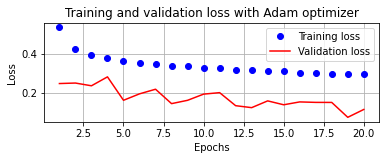

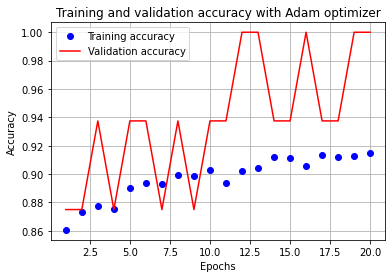

In [501]:
epochs = np.arange(20)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()


plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid('off')
plt.show()



# Regularization

#### Dropout decreases the frequency of weight updates.

#### Regularization forces the weights to have smaller range hence aboiding overfitting

In [502]:
# Regularization can be of 2 types: L1 and L2

In [515]:
torch.norm(torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float16),2)

tensor(9.5391, dtype=torch.float16)

In [518]:
torch.linalg.norm(torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float64),2)

tensor(9.5080, dtype=torch.float64)

In [519]:
torch.linalg.norm?

Docstring:
linalg.norm(A, ord=None, dim=None, keepdim=False, *, out=None, dtype=None) -> Tensor

Computes a vector or matrix norm.

Supports input of float, double, cfloat and cdouble dtypes.

Whether this function computes a vector or matrix norm is determined as follows:

- If :attr:`dim` is an `int`, the vector norm will be computed.
- If :attr:`dim` is a `2`-`tuple`, the matrix norm will be computed.
- If :attr:`dim`\ `= None` and :attr:`ord`\ `= None`,
  :attr:`A` will be flattened to 1D and the `2`-norm of the resulting vector will be computed.
- If :attr:`dim`\ `= None` and :attr:`ord` `!= None`, :attr:`A` must be 1D or 2D.

:attr:`ord` defines the norm that is computed. The following norms are supported:

======================     =========================  ========================================================
:attr:`ord`                norm for matrices          norm for vectors
======================     =========================  =========================================

In [520]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        self.x =x.float()/255 
        
        self.x = self.x.view(-1,28*28)
        
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index].to(device), self.y[index].to(device)
    
    def __len__(self):
        return len(self.x)
    

In [521]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size= 32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=32, shuffle = False)
    
    return trn_dl, val_dl

In [522]:
def get_model():
    model = nn.Sequential(
        
        nn.Linear(28*28, 1000),
        nn.ReLU(),
        
        nn.Linear(1000,10)
    ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr = 1e-3)
    return model, loss_fn, optimizer



In [523]:
def train_batch(x,y,model, optimizer, loss_fn):
    model.train()
    prediction = model(x)
    
    ##### adding the l2 norm
    l2_regularization = 0
    for param in model.parameters():
        l2_regularization += torch.norm(param,2)
    loss = loss_fn(prediction, y) + 0.0001 * l2_regularization 
    ### for l1, use torch.norm(param,1)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()

In [524]:
@torch.no_grad()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values , argmaxes = prediction.max(-1)
    #print(prediction)
    
    is_correct = argmaxes==y
    #print(is_correct)
    
    return is_correct.cpu().numpy().tolist()

In [525]:
@torch.no_grad()
def val_loss(x,y, model):
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [526]:
trn_dl , val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [527]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(10):
    print(f"epoch: {epoch}")
    
    train_epoch_losses, train_epoch_accuracies = [], []
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        
        batch_loss = train_batch(x,y,model, optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
        
    train_epoch_loss = np.array(train_epoch_losses).mean()
    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x,y, model)
        
        train_epoch_accuracies.extend(is_correct)
   
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x,y, model)
        validation_loss =  val_loss(x,y,model)

    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)
    
    
    print(f"Current loss: {train_epoch_loss}" )
    print(f"Current accuracy: {train_epoch_accuracy}")
    print(f"Current validation loss: {validation_loss}")
    print(f"Current validation accuracy: {val_epoch_accuracy}")

epoch: 0
Current loss: 0.47811395496527354
Current accuracy: 0.8694833333333334
Current validation loss: 0.23192472755908966
Current validation accuracy: 0.875
epoch: 1
Current loss: 0.3638313221255938
Current accuracy: 0.8826833333333334
Current validation loss: 0.26773831248283386
Current validation accuracy: 0.9375
epoch: 2
Current loss: 0.32642657628059385
Current accuracy: 0.8864333333333333
Current validation loss: 0.22091077268123627
Current validation accuracy: 0.9375
epoch: 3
Current loss: 0.30562627722620966
Current accuracy: 0.8918333333333334
Current validation loss: 0.26546549797058105
Current validation accuracy: 0.9375
epoch: 4
Current loss: 0.28748980676929153
Current accuracy: 0.9114666666666666
Current validation loss: 0.2196691781282425
Current validation accuracy: 0.9375
epoch: 5
Current loss: 0.2730815210600694
Current accuracy: 0.9119666666666667
Current validation loss: 0.08428351581096649
Current validation accuracy: 1.0
epoch: 6
Current loss: 0.2607341547528902

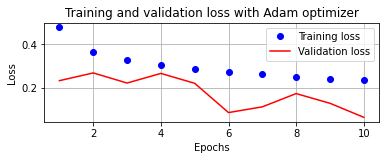

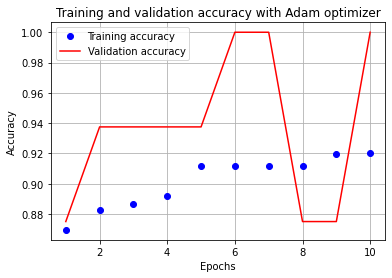

In [529]:
epochs = np.arange(10)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()


plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.grid('off')
plt.show()

